# LAB 8 

### STOCKS

In [3]:
import requests

# Replace 'YOUR_API_KEY' with your actual API key
api_key = 'A7XLMMXWDS57GYAH'

# Function to fetch stock data from Alpha Vantage API
def fetch_stock_data(symbol):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

# Function to extract relevant information from stock data
def extract_stock_info(data):
    time_series = data.get('Time Series (Daily)', {})
    latest_date = list(time_series.keys())[0]
    latest_data = time_series.get(latest_date, {})
    symbol = data.get('Meta Data', {}).get('2. Symbol', '')

    return {
        'Symbol': symbol,
        'Date': latest_date,
        'Open': latest_data.get('1. open', ''),
        'Close': latest_data.get('4. close', ''),
        'High': latest_data.get('2. high', ''),
        'Low': latest_data.get('3. low', ''),
        'Volume': latest_data.get('5. volume', ''),
    }

# Fetching and printing stock information for Microsoft (MSFT)
msft_data = fetch_stock_data('MSFT')
msft_info = extract_stock_info(msft_data)
print("Microsoft (MSFT) Stock Information:")
print(msft_info)

# Fetching and printing stock information for Apple (AAPL)
aapl_data = fetch_stock_data('AAPL')
aapl_info = extract_stock_info(aapl_data)
print("\nApple (AAPL) Stock Information:")
print(aapl_info)


Microsoft (MSFT) Stock Information:
{'Symbol': 'MSFT', 'Date': '2023-11-17', 'Open': '373.6100', 'Close': '369.8500', 'High': '374.3700', 'Low': '367.0000', 'Volume': '40325371'}

Apple (AAPL) Stock Information:
{'Symbol': 'AAPL', 'Date': '2023-11-17', 'Open': '190.2500', 'Close': '189.6900', 'High': '190.3800', 'Low': '188.5700', 'Volume': '50941404'}


In [4]:
import requests
import mysql.connector

# Alpha Vantage API key
api_key = 'A7XLMMXWDS57GYAH'

# Function to fetch stock data from Alpha Vantage
def fetch_stock_data(symbol):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

# Function to extract relevant stock information
def extract_stock_info(data):
    time_series = data.get('Time Series (Daily)', {})
    latest_date = list(time_series.keys())[0]
    latest_data = time_series.get(latest_date, {})
    symbol = data.get('Meta Data', {}).get('2. Symbol', '')

    return {
        'Symbol': symbol,
        'Date': latest_date,
        'Open': float(latest_data.get('1. open', '')),
        'Close': float(latest_data.get('4. close', '')),
        'High': float(latest_data.get('2. high', '')),
        'Low': float(latest_data.get('3. low', '')),
        'Volume': int(latest_data.get('5. volume', ''))
    }

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'timeseriesdb'
}

# Connect to the database
try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()

    # Fetching and inserting stock data for Microsoft (MSFT)
    msft_data = fetch_stock_data('MSFT')
    msft_info = extract_stock_info(msft_data)
    msft_query = "INSERT INTO stocks (symbol, date, open, close, high, low, volume) VALUES (%s, %s, %s, %s, %s, %s, %s)"
    msft_values = (msft_info['Symbol'], msft_info['Date'], msft_info['Open'], msft_info['Close'], msft_info['High'], msft_info['Low'], msft_info['Volume'])
    cursor.execute(msft_query, msft_values)

    # Fetching and inserting stock data for Apple (AAPL)
    aapl_data = fetch_stock_data('AAPL')
    aapl_info = extract_stock_info(aapl_data)
    aapl_query = "INSERT INTO stocks (symbol, date, open, close, high, low, volume) VALUES (%s, %s, %s, %s, %s, %s, %s)"
    aapl_values = (aapl_info['Symbol'], aapl_info['Date'], aapl_info['Open'], aapl_info['Close'], aapl_info['High'], aapl_info['Low'], aapl_info['Volume'])
    cursor.execute(aapl_query, aapl_values)

    # Commit changes and close the connection
    connection.commit()
    print("Data inserted successfully!")

except mysql.connector.Error as e:
    print(f"Error inserting data: {e}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("Connection closed.")


Data inserted successfully!
Connection closed.


### Technical

In [17]:
import requests

# Replace 'YOUR_API_KEY' with your actual API key
api_key = '3E6V8Q1B5KM2YX4N'

# Function to fetch SMA and RSI for a given symbol from Alpha Vantage
def fetch_sma_rsi(symbol):
    url = f"https://www.alphavantage.co/query?function=SMA&symbol={symbol}&interval=daily&time_period=20&series_type=close&apikey={api_key}"
    response_sma = requests.get(url)
    sma_data = response_sma.json()

    url = f"https://www.alphavantage.co/query?function=RSI&symbol={symbol}&interval=daily&time_period=14&series_type=close&apikey={api_key}"
    response_rsi = requests.get(url)
    rsi_data = response_rsi.json()

    return sma_data, rsi_data

# Function to extract relevant information
def extract_info(symbol, sma_data, rsi_data):
    sma_values = sma_data.get('Technical Analysis: SMA', {})
    rsi_values = rsi_data.get('Technical Analysis: RSI', {})

    latest_date_sma = list(sma_values.keys())[0] if sma_values else None
    latest_date_rsi = list(rsi_values.keys())[0] if rsi_values else None

    if latest_date_sma and latest_date_rsi:
        latest_date = min(latest_date_sma, latest_date_rsi)
        symbol_data = sma_data.get('Meta Data', {}).get('2: Symbol', '')

        return {
            'Symbol': symbol_data,
            'Date': latest_date,
            'SMA': float(sma_values[latest_date]['SMA']),
            'RSI': float(rsi_values[latest_date]['RSI'])
        }
    else:
        return None

# Fetching and printing SMA and RSI for Microsoft (MSFT)
msft_sma, msft_rsi = fetch_sma_rsi('MSFT')
msft_info = extract_info('MSFT', msft_sma, msft_rsi)
if msft_info:
    print("Microsoft (MSFT) - SMA and RSI:")
    print(msft_info)
else:
    print("No data available for Microsoft (MSFT) for the latest date.")

# Fetching and printing SMA and RSI for Apple (AAPL)
aapl_sma, aapl_rsi = fetch_sma_rsi('AAPL')
aapl_info = extract_info('AAPL', aapl_sma, aapl_rsi)
if aapl_info:
    print("\nApple (AAPL) - SMA and RSI:")
    print(aapl_info)
else:
    print("No data available for Apple (AAPL) for the latest date.")


Microsoft (MSFT) - SMA and RSI:
{'Symbol': '', 'Date': '2023-11-17', 'SMA': 351.6043, 'RSI': 67.6119}

Apple (AAPL) - SMA and RSI:
{'Symbol': '', 'Date': '2023-11-17', 'SMA': 178.5576, 'RSI': 71.174}


In [20]:
import requests
import mysql.connector

# Replace 'YOUR_API_KEY' with your actual API key
api_key = 'A7XLMMXWDS57GYAH'

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'timeseriesdb'
}

# Function to fetch SMA and RSI for a given symbol from Alpha Vantage
def fetch_sma_rsi(symbol):
    url_sma = f"https://www.alphavantage.co/query?function=SMA&symbol={symbol}&interval=daily&time_period=20&series_type=close&apikey={api_key}"
    response_sma = requests.get(url_sma)
    sma_data = response_sma.json()

    url_rsi = f"https://www.alphavantage.co/query?function=RSI&symbol={symbol}&interval=daily&time_period=14&series_type=close&apikey={api_key}"
    response_rsi = requests.get(url_rsi)
    rsi_data = response_rsi.json()

    return sma_data, rsi_data

# Function to extract relevant information
def extract_info(symbol, sma_data, rsi_data):
    sma_values = sma_data.get('Technical Analysis: SMA', {})
    rsi_values = rsi_data.get('Technical Analysis: RSI', {})

    latest_date_sma = list(sma_values.keys())[0] if sma_values else None
    latest_date_rsi = list(rsi_values.keys())[0] if rsi_values else None

    if latest_date_sma and latest_date_rsi:
        latest_date = min(latest_date_sma, latest_date_rsi)
        symbol_data = sma_data.get('Meta Data', {}).get('2: Symbol', '')

        return {
            'Symbol': symbol_data,
            'Date': latest_date,
            'SMA': float(sma_values[latest_date]['SMA']),
            'RSI': float(rsi_values[latest_date]['RSI'])
        }
    else:
        return None

# Connect to the database
try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()

    # Fetching and inserting SMA and RSI for Microsoft (MSFT)
    msft_sma, msft_rsi = fetch_sma_rsi('MSFT')
    msft_info = extract_info('MSFT', msft_sma, msft_rsi)
    if msft_info:
        msft_query = "INSERT INTO technical_indicators (symbol, date, sma_20, rsi) VALUES (%s, %s, %s, %s)"
        msft_values = (msft_info['Symbol'], msft_info['Date'], msft_info['SMA'], msft_info['RSI'])
        cursor.execute(msft_query, msft_values)
        connection.commit()
        print("Microsoft (MSFT) - SMA and RSI inserted successfully.")
    else:
        print("No data available for Microsoft (MSFT) for the latest date.")

    # Fetching and inserting SMA and RSI for Apple (AAPL)
    aapl_sma, aapl_rsi = fetch_sma_rsi('AAPL')
    aapl_info = extract_info('AAPL', aapl_sma, aapl_rsi)
    if aapl_info:
        aapl_query = "INSERT INTO technical_indicators (symbol, date, sma_20, rsi) VALUES (%s, %s, %s, %s)"
        aapl_values = (aapl_info['Symbol'], aapl_info['Date'], aapl_info['SMA'], aapl_info['RSI'])
        cursor.execute(aapl_query, aapl_values)
        connection.commit()
        print("Apple (AAPL) - SMA and RSI inserted successfully.")
    else:
        print("No data available for Apple (AAPL) for the latest date.")

except mysql.connector.Error as e:
    print(f"Error inserting data: {e}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("Connection closed.")


Microsoft (MSFT) - SMA and RSI inserted successfully.
Apple (AAPL) - SMA and RSI inserted successfully.
Connection closed.


### news_sentiment_analysis

In [22]:
import random
from datetime import date

def generate_random_sentiment():
    positive_articles = random.randint(5, 20)
    negative_articles = random.randint(1, 10)
    neutral_articles = random.randint(10, 30)

    return {
        'Positive Articles': positive_articles,
        'Negative Articles': negative_articles,
        'Neutral Articles': neutral_articles
    }

# Get today's date
today_date = date.today()

# Generate random sentiment data for Microsoft (MSFT) and Apple (AAPL)
msft_sentiment = generate_random_sentiment()
aapl_sentiment = generate_random_sentiment()

print(f"Date: {today_date}")
print("Microsoft (MSFT) - Sentiment Analysis:")
print(msft_sentiment)

print("\nApple (AAPL) - Sentiment Analysis:")
print(aapl_sentiment)


Date: 2023-11-18
Microsoft (MSFT) - Sentiment Analysis:
{'Positive Articles': 5, 'Negative Articles': 2, 'Neutral Articles': 19}

Apple (AAPL) - Sentiment Analysis:
{'Positive Articles': 19, 'Negative Articles': 1, 'Neutral Articles': 23}


In [23]:
import random
from datetime import date

def generate_random_sentiment():
    positive_articles = random.randint(5, 20)
    negative_articles = random.randint(1, 10)
    neutral_articles = random.randint(10, 30)

    return {
        'Positive Articles': positive_articles,
        'Negative Articles': negative_articles,
        'Neutral Articles': neutral_articles
    }

def generate_random_description():
    descriptions = [
        "Strong quarterly earnings, positive market sentiment.",
        "Mixed market reactions, new product announcements.",
        "Bearish outlook due to recent market trends.",
        "Positive analyst reviews, expected growth in the sector."
    ]

    return random.choice(descriptions)

# Get today's date
today_date = date.today()

# Generate random sentiment data and descriptions for Microsoft (MSFT) and Apple (AAPL)
msft_sentiment = generate_random_sentiment()
aapl_sentiment = generate_random_sentiment()

msft_description = generate_random_description()
aapl_description = generate_random_description()

print(f"Date: {today_date}")

print("\nMicrosoft (MSFT) - Sentiment Analysis:")
print(msft_sentiment)
print("\nMicrosoft (MSFT) - Description:")
print(msft_description)

print("\nApple (AAPL) - Sentiment Analysis:")
print(aapl_sentiment)
print("\nApple (AAPL) - Description:")
print(aapl_description)


Date: 2023-11-18

Microsoft (MSFT) - Sentiment Analysis:
{'Positive Articles': 6, 'Negative Articles': 6, 'Neutral Articles': 10}

Microsoft (MSFT) - Description:
Strong quarterly earnings, positive market sentiment.

Apple (AAPL) - Sentiment Analysis:
{'Positive Articles': 12, 'Negative Articles': 7, 'Neutral Articles': 28}

Apple (AAPL) - Description:
Bearish outlook due to recent market trends.


In [24]:
import random
from datetime import date
import mysql.connector

def generate_random_sentiment():
    positive_articles = random.randint(5, 20)
    negative_articles = random.randint(1, 10)
    neutral_articles = random.randint(10, 30)

    return {
        'Positive Articles': positive_articles,
        'Negative Articles': negative_articles,
        'Neutral Articles': neutral_articles
    }

def generate_random_description():
    descriptions = [
        "Strong quarterly earnings, positive market sentiment.",
        "Mixed market reactions, new product announcements.",
        "Bearish outlook due to recent market trends.",
        "Positive analyst reviews, expected growth in the sector."
    ]

    return random.choice(descriptions)

# Get today's date
today_date = date.today()

# Generate random sentiment data and descriptions for Microsoft (MSFT) and Apple (AAPL)
msft_sentiment = generate_random_sentiment()
aapl_sentiment = generate_random_sentiment()

msft_description = generate_random_description()
aapl_description = generate_random_description()

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'timeseriesdb'
}

try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()

    # Inserting sentiment analysis data into news_sentiment_analysis table
    news_sentiment_query = "INSERT INTO news_sentiment_analysis (date, positive_articles, negative_articles, neutral_articles) VALUES (%s, %s, %s, %s)"
    cursor.execute(news_sentiment_query, (today_date, msft_sentiment['Positive Articles'], msft_sentiment['Negative Articles'], msft_sentiment['Neutral Articles']))
    cursor.execute(news_sentiment_query, (today_date, aapl_sentiment['Positive Articles'], aapl_sentiment['Negative Articles'], aapl_sentiment['Neutral Articles']))

    # Inserting descriptions into external_events table
    external_events_query = "INSERT INTO external_events (date, event_description) VALUES (%s, %s)"
    cursor.execute(external_events_query, (today_date, msft_description))
    cursor.execute(external_events_query, (today_date, aapl_description))

    connection.commit()
    print("Data inserted successfully into MySQL.")

except mysql.connector.Error as error:
    print(f"Error inserting data: {error}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed.")


Data inserted successfully into MySQL.
MySQL connection is closed.


### Visualization 

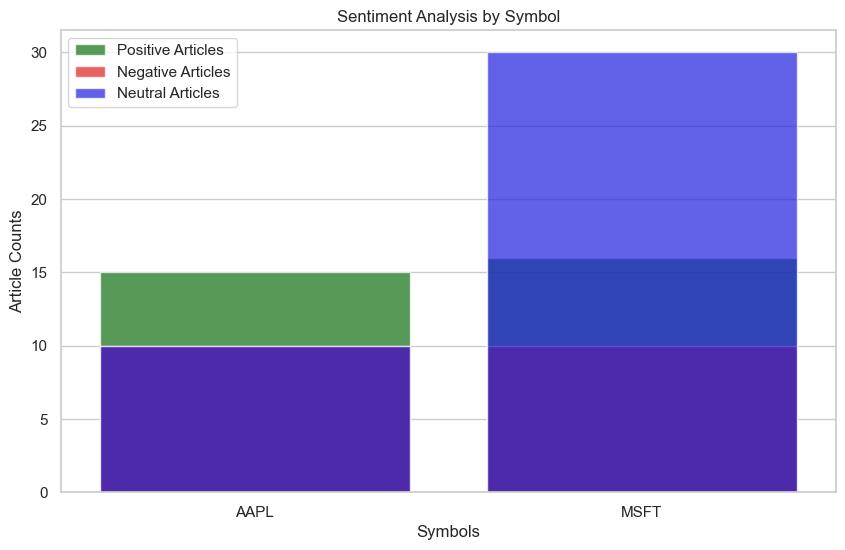

MySQL connection is closed.


In [25]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'timeseriesdb'
}

try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()

    # Retrieving sentiment analysis data
    sentiment_query = "SELECT positive_articles, negative_articles, neutral_articles FROM news_sentiment_analysis"
    cursor.execute(sentiment_query)
    sentiment_data = cursor.fetchall()

    # Retrieving symbol data from the stocks table
    symbol_query = "SELECT symbol FROM stocks"
    cursor.execute(symbol_query)
    symbols = cursor.fetchall()

    # Transforming data for visualization
    positive_counts = [data[0] for data in sentiment_data]
    negative_counts = [data[1] for data in sentiment_data]
    neutral_counts = [data[2] for data in sentiment_data]
    symbols = [symbol[0] for symbol in symbols]

    # Creating a visualization using Seaborn
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    sns.barplot(x=symbols, y=positive_counts, color='green', alpha=0.7, label='Positive Articles')
    sns.barplot(x=symbols, y=negative_counts, color='red', alpha=0.7, label='Negative Articles')
    sns.barplot(x=symbols, y=neutral_counts, color='blue', alpha=0.7, label='Neutral Articles')
    plt.title('Sentiment Analysis by Symbol')
    plt.xlabel('Symbols')
    plt.ylabel('Article Counts')
    plt.legend()
    plt.show()

except mysql.connector.Error as error:
    print(f"Error fetching data: {error}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed.")


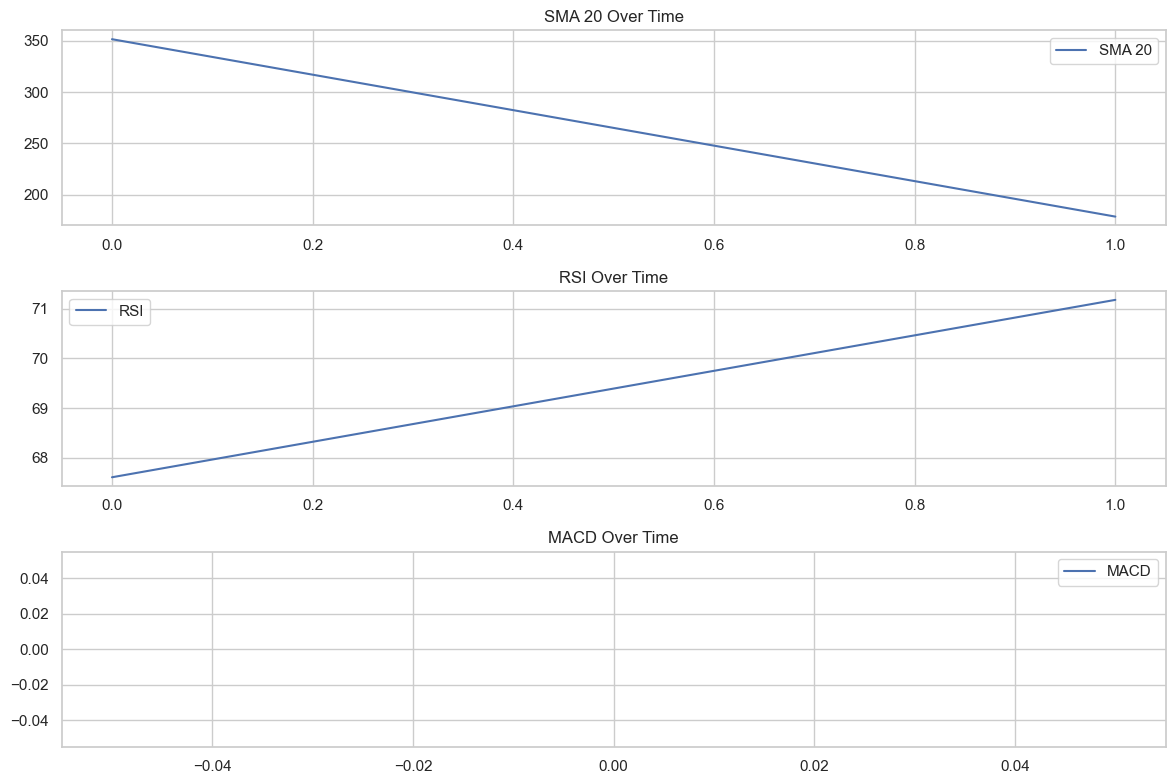

MySQL connection is closed.


In [26]:
import mysql.connector
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'timeseriesdb'
}

try:
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()

    # Retrieving data from the technical_indicators table
    query = "SELECT symbol, sma_20, rsi, macd FROM technical_indicators"
    cursor.execute(query)
    data = cursor.fetchall()

    symbols = []
    sma_20 = []
    rsi = []
    macd = []

    for row in data:
        symbols.append(row[0])
        sma_20.append(row[1])
        rsi.append(row[2])
        macd.append(row[3])

    # Plotting the data
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(sma_20, label='SMA 20')
    plt.title('SMA 20 Over Time')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(rsi, label='RSI')
    plt.title('RSI Over Time')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(macd, label='MACD')
    plt.title('MACD Over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

except mysql.connector.Error as error:
    print(f"Error fetching data: {error}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed.")
